# **Aviation Incident Analysis: Insights and Safety Recommendations**

## **Overview**

This project focuses on analyzing aviation incident data to identify **trends**, **factors contributing to accidents**, and **actionable recommendations** for enhancing aviation safety. 
The analysis leverages:
- **Descriptive statistics**
- **Visualizations**
- **Data-driven insights**

These methods aim to uncover patterns and inform decision-making in the aviation industry.

## **Business understanding**

## Business Problem

The company is expanding into new industries to diversify its portfolio, specifically by entering the aviation market. The goal is to purchase and operate aircraft for commercial and private enterprises. The company is concerned about the potential risks associated with different types of aircraft.

The task is to identify the lowest-risk aircraft to help the company make informed purchasing decisions. The findings must be translated into actionable insights for the head of the new aviation division.

## Objectives
- Analyze historical aviation data to assess risk factors for various aircraft.
- Identify trends and patterns in incidents related to aircraft type, manufacturer, and usage.
- Provide recommendations on the safest aircraft for purchase based on data-driven insights.
## Key Questions
- What are the trends in accidents across different phases of flight?
- How has the frequency of aviation accidents changed over time?
- Which locations and weather conditions are most associated with aviation accidents?
- What are the most common causes of aviation incidents?
- What is the impact of aircraft damage type on fatality counts?
  
 ## Key Stakeholders
- Aviation Regulatory Authorities
- Aircraft Manufacturers
- Airlines and Aviation Operators
- Aircraft Maintenance and Service Providers
- Insurance Companies
- Pilots,Flight Crew & Passengers
  
## Key Deliverables
- A comprehensive analysis of aviation incident data.
- Risk assessment for various aircraft types and manufacturers.
- Actionable recommendations on the safest aircraft to purchase and operate.

# Data Understanding and Analysis

 ## Source & Description of data
 This is a dataset from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters

 # Data Understanding and Analysis       

 a

In [31]:
##import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import datetime as dt
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')



In [30]:
# Loading the data set
df = pd.read_csv(r"C:\Users\Hp\Desktop\Moringa\AviationData.csv", encoding='ISO-8859-1')





In [3]:
# Reading the first five rows of the aviation data set
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [15]:
# Reading the last five rows of the aviation data set
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [16]:
#Key Summary statistics
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [17]:
#Explore key columns
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [23]:
#Dataset sumarry
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [8]:
#Checking missing values

df.isna().sum()  # We don't have missing values for event.Id, Investigation.Type, Accident.Number, Event.Date



Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Latitude                  0
Longitude                 0
Airport.Code              0
Airport.Name              0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
Publication.Date          0
dtype: int64

In [7]:
# Impute categorical columns with mode or "Unknown"
df['Location'].fillna('Unknown', inplace=True)
df['Country'].fillna('Unknown', inplace=True)
df['Make'].fillna('Unknown', inplace=True)
df['Model'].fillna('Unknown', inplace=True)
df['Amateur.Built'].fillna(df['Amateur.Built'].mode()[0], inplace=True)
df['Engine.Type'].fillna(df['Engine.Type'].mode()[0], inplace=True)
df['Injury.Severity'].fillna('Unknown', inplace=True)
df['Aircraft.damage'].fillna('Unknown', inplace=True)
df['Registration.Number'].fillna('Unknown', inplace=True)
df['Purpose.of.flight'].fillna('Unknown', inplace=True)
df['Weather.Condition'].fillna(df['Weather.Condition'].mode()[0], inplace=True)
df['Broad.phase.of.flight'].fillna('Unknown', inplace=True)
df['Report.Status'].fillna('Unknown', inplace=True)
df['Publication.Date'].fillna(df['Publication.Date'].mode()[0], inplace=True)
df['Aircraft.Category'].fillna(df['Aircraft.Category'].mode()[0], inplace=True)

# Impute numerical columns with mean/median
df['Number.of.Engines'].fillna(df['Number.of.Engines'].mean(), inplace=True)
df['Total.Fatal.Injuries'].fillna(df['Total.Fatal.Injuries'].mean(), inplace=True)
df['Total.Serious.Injuries'].fillna(df['Total.Serious.Injuries'].mean(), inplace=True)
df['Total.Minor.Injuries'].fillna(df['Total.Minor.Injuries'].mean(), inplace=True)
df['Total.Uninjured'].fillna(df['Total.Uninjured'].mean(), inplace=True)

# Handle columns with substantial missing values
df['Latitude'].fillna('Unknown', inplace=True)
df['Longitude'].fillna('Unknown', inplace=True)
df['Airport.Code'].fillna('Unknown', inplace=True)
df['Airport.Name'].fillna('Unknown', inplace=True)

# Drop columns with excessive missing values
df.drop(['FAR.Description', 'Schedule', 'Air.carrier'], axis=1, inplace=True)


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88889 non-null  object 
 5   Country                 88889 non-null  object 
 6   Latitude                88889 non-null  object 
 7   Longitude               88889 non-null  object 
 8   Airport.Code            88889 non-null  object 
 9   Airport.Name            88889 non-null  object 
 10  Injury.Severity         88889 non-null  object 
 11  Aircraft.damage         88889 non-null  object 
 12  Aircraft.Category       88889 non-null  object 
 13  Registration.Number     88889 non-null  object 
 14  Make                    88889 non-null

# Data Cleaning and Handling

In [9]:
#Checking if data cleaning is complete(No null values)

df.isnull().sum()

Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Latitude                  0
Longitude                 0
Airport.Code              0
Airport.Name              0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
Publication.Date          0
dtype: int64

# **Visualizations**

## Incident Trends Over Time

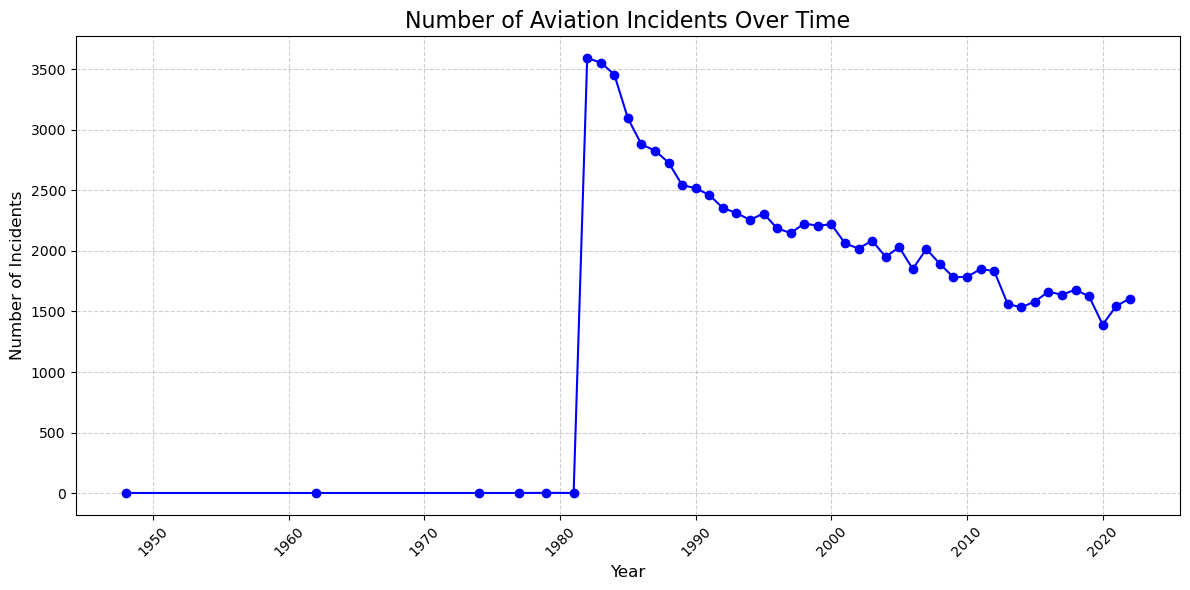

In [10]:
#Creating a line plot for incident trends over time

df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')
df['Year'] = df['Event.Date'].dt.year
incident_trends = df.groupby('Year').size()

plt.figure(figsize=(12, 6))
plt.plot(incident_trends.index, incident_trends.values, marker='o', color='b', linestyle='-')
plt.title('Number of Aviation Incidents Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Incident Distribution by Aircraft Type and Manufacturer

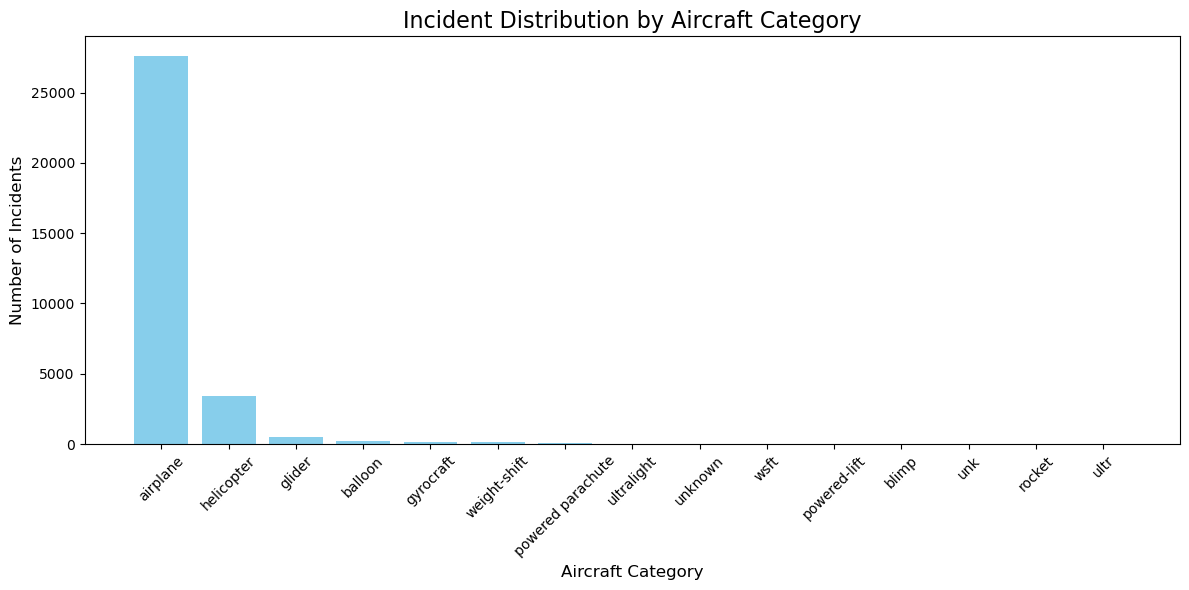

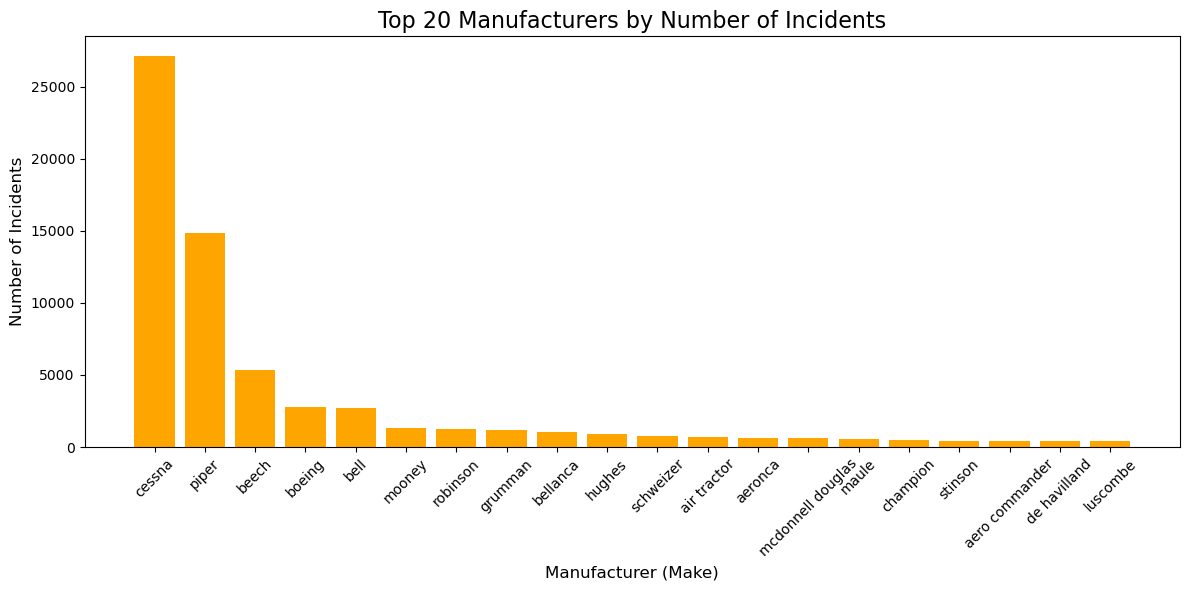

In [22]:
# Convert all values in 'Aircraft.Category' and 'Make' to lowercase for consistent comparison
df['Aircraft.Category'] = df['Aircraft.Category'].str.lower()
df['Make'] = df['Make'].str.lower()

# Incident Distribution by Aircraft Category
aircraft_category_counts = df['Aircraft.Category'].value_counts()

# Bar plot for Aircraft Category
plt.figure(figsize=(12, 6))
plt.bar(aircraft_category_counts.index, aircraft_category_counts.values, color='skyblue')
plt.title('Incident Distribution by Aircraft Category', fontsize=16)
plt.xlabel('Aircraft Category', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Incident Distribution by Manufacturer (Make)
manufacturer_counts = df['Make'].value_counts()

# Top N manufacturers to display
top_n = 20  

plt.figure(figsize=(12, 6))
plt.bar(manufacturer_counts.index[:top_n], manufacturer_counts.values[:top_n], color='orange')
plt.title('Top 20 Manufacturers by Number of Incidents', fontsize=16)
plt.xlabel('Manufacturer (Make)', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##  Severity of Incidents

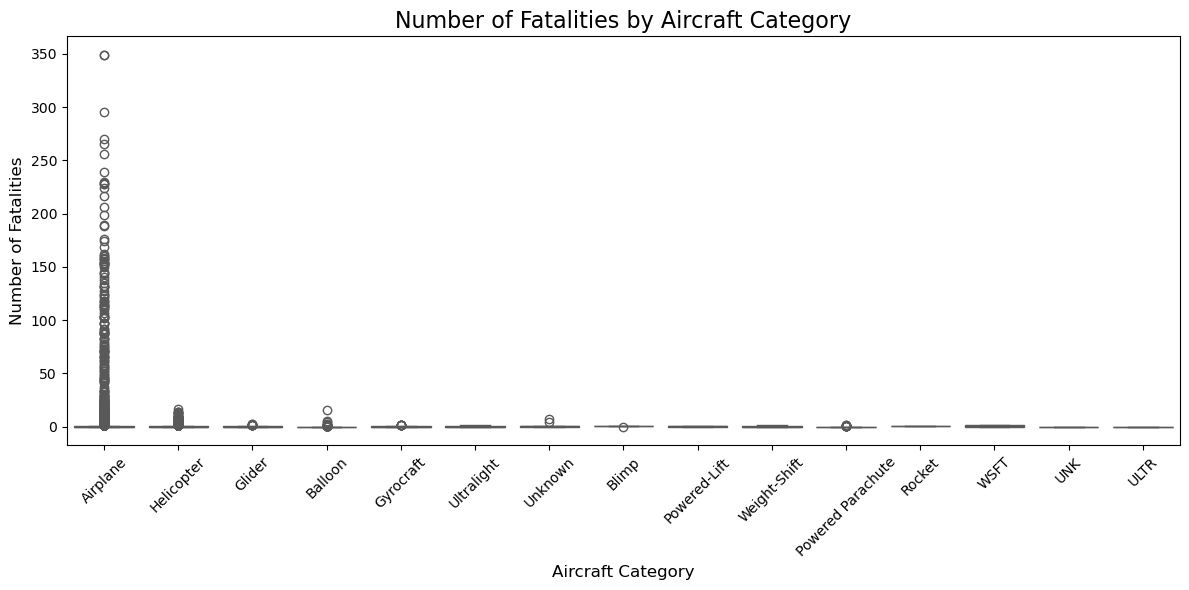

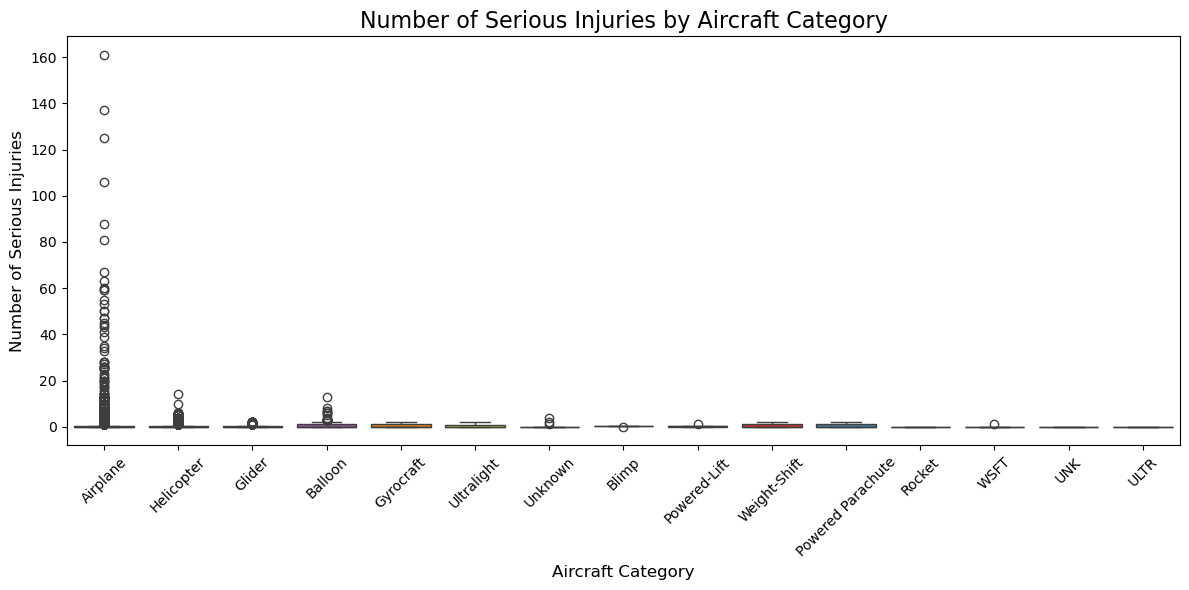

In [58]:


# Box plot for Number of Fatalities across Aircraft Category 
plt.figure(figsize=(12, 6))
sns.boxplot(x='Aircraft.Category', y='Total.Fatal.Injuries', data=df, palette='Set2')
plt.title('Number of Fatalities by Aircraft Category', fontsize=16)
plt.xlabel('Aircraft Category', fontsize=12)
plt.ylabel('Number of Fatalities', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Box plot for Number of Serious Injuries across Aircraft Category 
plt.figure(figsize=(12, 6))
sns.boxplot(x='Aircraft.Category', y='Total.Serious.Injuries', data=df, palette='Set1')
plt.title('Number of Serious Injuries by Aircraft Category', fontsize=16)
plt.xlabel('Aircraft Category', fontsize=12)
plt.ylabel('Number of Serious Injuries', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()







## Weather and Phase of Flight

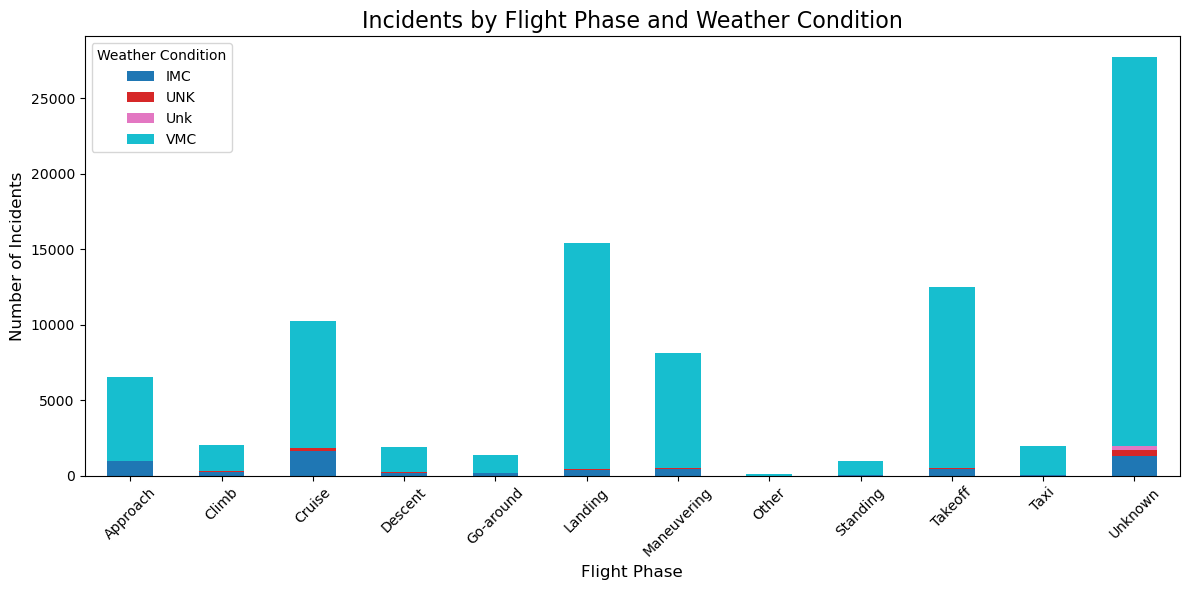

In [59]:

#Stacked bar chart

# Group by Broad.phase.of.flight and Weather.Condition
incident_by_phase_weather = df.groupby(['Broad.phase.of.flight', 'Weather.Condition']).size().unstack(fill_value=0)

# Plot the stacked bar plot
incident_by_phase_weather.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab10')
plt.title('Incidents by Flight Phase and Weather Condition', fontsize=16)
plt.xlabel('Flight Phase', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Weather Condition')
plt.tight_layout()
plt.show()


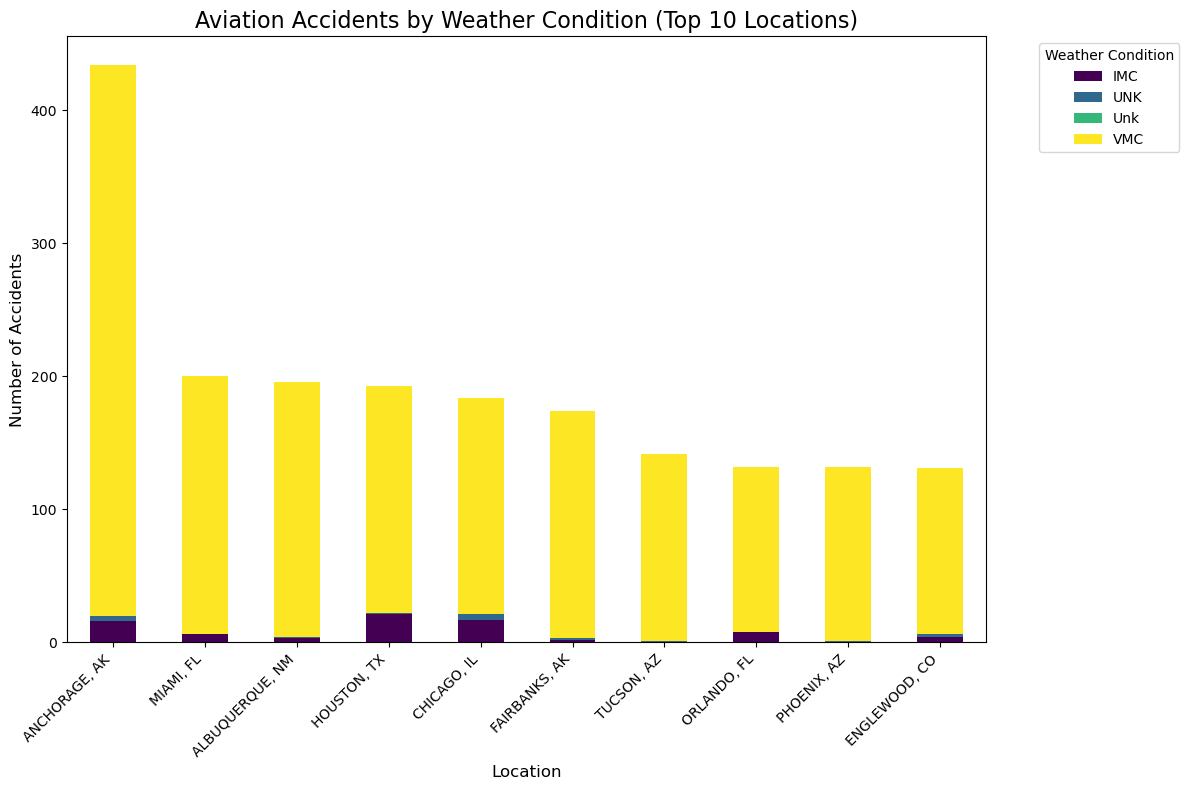

In [18]:
#Stacked bar chart 

# Group data by Location and Weather Condition to get accident counts
location_weather_data = (
    df.groupby(['Location', 'Weather.Condition'])
    .size()
    .unstack(fill_value=0)
)

# Select the top 10 locations with the highest total accidents
top_locations = location_weather_data.sum(axis=1).nlargest(10).index
location_weather_data_top = location_weather_data.loc[top_locations]

# Plot the stacked bar chart
location_weather_data_top.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='viridis')

# Add labels and title
plt.title('Aviation Accidents by Weather Condition (Top 10 Locations)', fontsize=16)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Weather Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

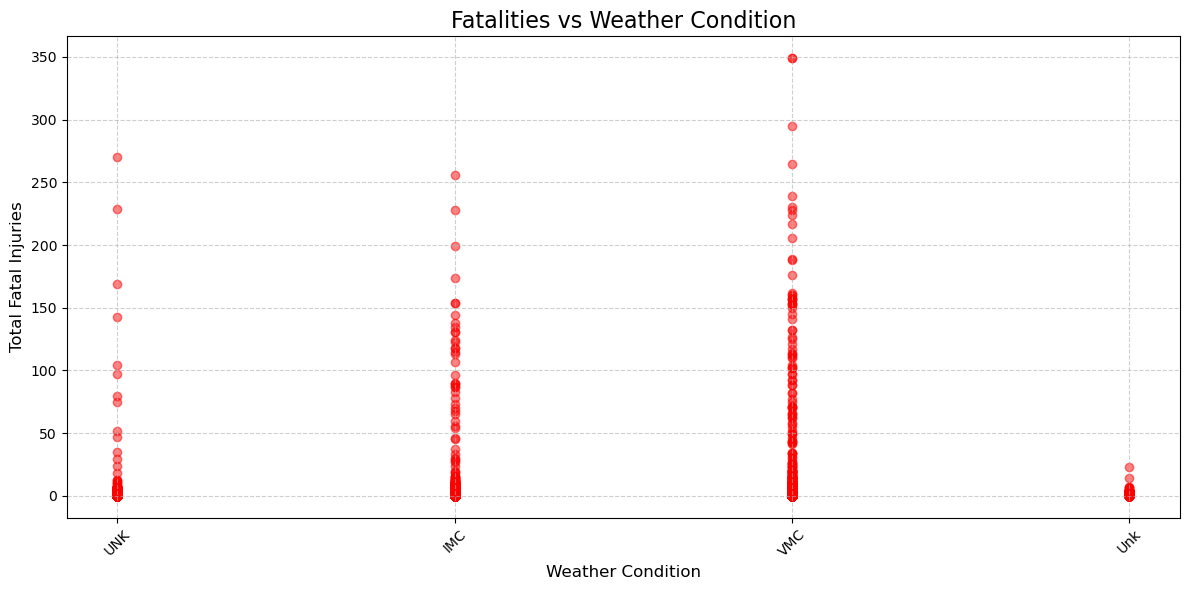

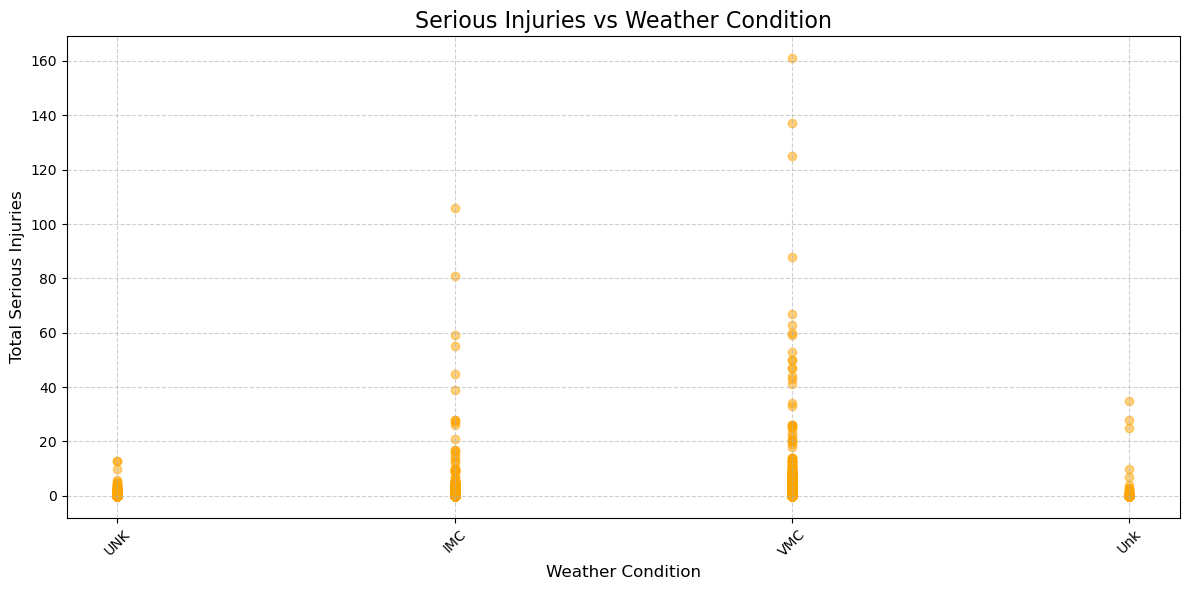

In [14]:

# Scatter plot for Fatalities vs Weather Condition
plt.figure(figsize=(12, 6))
plt.scatter(df['Weather.Condition'], df['Total.Fatal.Injuries'], color='red', alpha=0.5)
plt.title('Fatalities vs Weather Condition', fontsize=16)
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Total Fatal Injuries', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Scatter plot for Serious Injuries vs Weather Condition
plt.figure(figsize=(12, 6))
plt.scatter(df['Weather.Condition'], df['Total.Serious.Injuries'], color='orange', alpha=0.5)
plt.title('Serious Injuries vs Weather Condition', fontsize=16)
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Total Serious Injuries', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


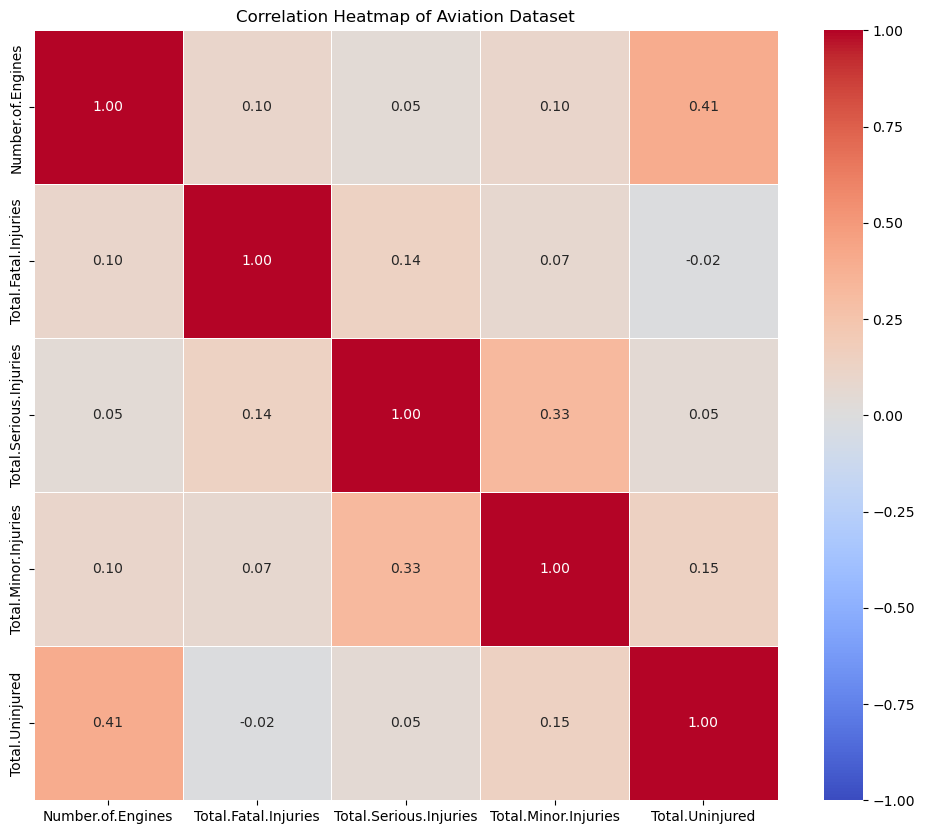

In [29]:
# Correlation Heatmap of the  Aviation Dataset
# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Aviation Dataset')
plt.show()


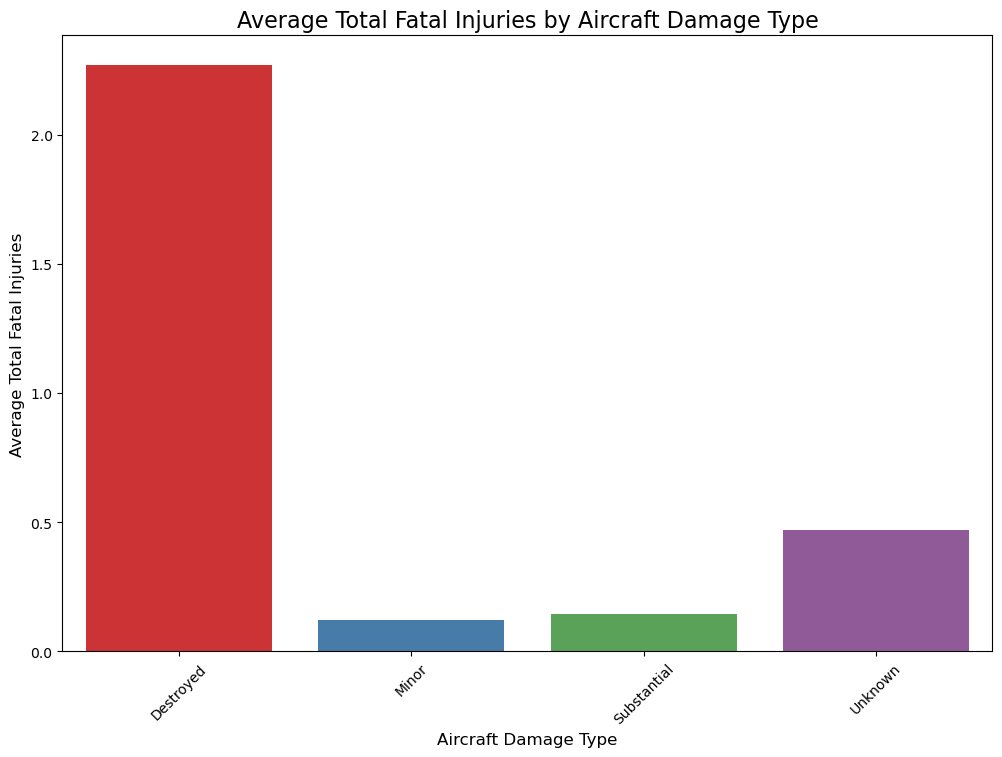

In [47]:


# Convert 'Total.Fatal.Injuries' to numeric if not already
df['Total.Fatal.Injuries'] = pd.to_numeric(df['Total.Fatal.Injuries'], errors='coerce')

# Group by 'AircraftDamage' and calculate the average 'Total.Fatal.Injuries' for each damage type
avg_injuries = df.groupby('Aircraft.damage')['Total.Fatal.Injuries'].mean().reset_index()

# Create a bar plot to visualize the average total fatal injuries by aircraft damage type
plt.figure(figsize=(12, 8))
sns.barplot(x='Aircraft.damage', y='Total.Fatal.Injuries', data=avg_injuries, palette="Set1")
plt.title('Average Total Fatal Injuries by Aircraft Damage Type', fontsize=16)
plt.xlabel('Aircraft Damage Type', fontsize=12)
plt.ylabel('Average Total Fatal Injuries', fontsize=12)
plt.xticks(rotation=45)
plt.show()




# Key Findings from Visualizations:

## Trends in Incidents Over Time (Line and Bar Plots):

In both Line and Bar plots, incidents from the 1980s to 2023 shows a decreasing trend,.

## Incident Severity Analysis ( Box Plots):

Fatalities, serious, and minor injuries are distributed across various flight phases and aircraft types. The box plot reveals the severity of incidents tied to specific aircraft makes and categories, indicating which aircraft have a higher likelihood of incidents with severe outcomes.
Aircraft makes with higher fatality rates or serious injuries can be flagged for additional review or enhanced maintenance.


## Aircraft Make/Model and Incident Severity ( Heatmap):

The aircraft make and model show varying levels of incident severity, with certain manufacturers or models associated with higher numbers of fatalities or serious injuries. This may highlight areas for manufacturers to improve safety features, or for airlines to prioritize specific makes/models for safety upgrades.
## Correlation Analysis (Heatmap):
Since the highest correlation is only 0.41, it shows that the variables in the dataset don't have any very strong direct relationships. This could indicate that other factors (like weather conditions, or maintenance records) might be influencing accidents more than the numerical factors being considered.